# KISS-ICP running on the KITTI-Raw benchmark dataset

The whole purpose of this notebook is to have a reproducable entry point for the experiments of the paper. You can also modify the system and just run this notebook to inspect the overall results.

The main ingredient of this experiment is to test the "deskew" algoirthm we use.

## Expected dataset layout

```sh
<data/kitti-odometry/raw>
├── 2011_09_26
│   ├── calib_cam_to_cam.txt
│   ├── calib_imu_to_velo.txt
│   └── calib_velo_to_cam.txt
├── 2011_09_30
│   ├── 2011_09_30_drive_0016_sync
│   │   ├── image_00
│   │   ├── image_01
│   │   ├── image_02
│   │   ├── image_03
│   │   ├── oxts
│   │   └── velodyne_points
```

In [1]:
# Install KISS-ICP and Plotting tools
%pip install kiss-icp ipympl evo >/dev/null

import os
from pathlib import Path

import kiss_icp
import matplotlib.pyplot as plt
import numpy as np
from evo.tools import plot
from kiss_icp.config import load_config
from kiss_icp.datasets import dataset_factory
from kiss_icp.pipeline import OdometryPipeline
from rich import print

%autoreload 2
%matplotlib inline
%matplotlib widget

Note: you may need to restart the kernel to use updated packages.


In [2]:
data_root = os.environ.get("DATASETS")
kitti_root = Path(os.path.join(data_root, "kitti-odometry/raw"))
cfg_file = os.path.join(os.path.dirname(kiss_icp.__file__), "config/default.yaml")

print(f"Reading datasets from : {data_root}")
print(f"Configuration:")
print(load_config(cfg_file))

Reading datasets from : /home/ivizzo/data/

Configuration:

{
    'out_dir': 'results',
    'use_cache': True,
    'data': {
        'lidar_frequency': 10.0,
        'preprocess': True,
        'max_range': 100.0,
        'min_range': 5.0
    },
    'mapping': {'max_points_per_voxel': 20},
    'adaptive_threshold': {'initial_threshold': 2.0, 'min_motion_th': 0.1}
}

In [3]:
from kiss_icp_eval import run_sequence


def kitti_raw_sequence(sequence: int):
    return OdometryPipeline(
        dataset=dataset_factory(
            dataloader="kitti_raw",
            data_dir=kitti_root,
            config=cfg_file,
            sequence=sequence,
        ),
        config=cfg_file,
        deskew=True,
    )


results = {}
for sequence in range(0, 11):
    if sequence == 3:
        continue
    run_sequence(kitti_raw_sequence, sequence=sequence, results=results)

Now evaluating sequence 00


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.526   %      
         Average Rotational Error   0.199   deg/m  
  Absoulte Trajectory Error (ATE)   6.250   m      
  Absoulte Rotational Error (ARE)   0.021   rad    
                Average Frequency    44     Hz     
                  Average Runtime    22     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 01


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   0.633    %      
         Average Rotational Error   0.159    deg/m  
  Absoulte Trajectory Error (ATE)   40.007   m      
  Absoulte Rotational Error (ARE)   0.025    rad    
                Average Frequency     36     Hz     
                  Average Runtime     27     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence 02


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   0.533    %      
         Average Rotational Error   0.168    deg/m  
  Absoulte Trajectory Error (ATE)   18.601   m      
  Absoulte Rotational Error (ARE)   0.027    rad    
                Average Frequency     42     Hz     
                  Average Runtime     23     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence 04


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.358   %      
         Average Rotational Error   0.148   deg/m  
  Absoulte Trajectory Error (ATE)   1.070   m      
  Absoulte Rotational Error (ARE)   0.580   rad    
                Average Frequency    37     Hz     
                  Average Runtime    27     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 05


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.314   %      
         Average Rotational Error   0.146   deg/m  
  Absoulte Trajectory Error (ATE)   2.096   m      
  Absoulte Rotational Error (ARE)   0.012   rad    
                Average Frequency    44     Hz     
                  Average Runtime    22     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 06


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.264   %      
         Average Rotational Error   0.082   deg/m  
  Absoulte Trajectory Error (ATE)   0.890   m      
  Absoulte Rotational Error (ARE)   0.006   rad    
                Average Frequency    35     Hz     
                  Average Runtime    28     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 07


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.330   %      
         Average Rotational Error   0.174   deg/m  
  Absoulte Trajectory Error (ATE)   0.787   m      
  Absoulte Rotational Error (ARE)   0.007   rad    
                Average Frequency    46     Hz     
                  Average Runtime    21     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 08


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.835   %      
         Average Rotational Error   0.186   deg/m  
  Absoulte Trajectory Error (ATE)   5.106   m      
  Absoulte Rotational Error (ARE)   0.017   rad    
                Average Frequency    39     Hz     
                  Average Runtime    25     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 09


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.486   %      
         Average Rotational Error   0.131   deg/m  
  Absoulte Trajectory Error (ATE)   3.706   m      
  Absoulte Rotational Error (ARE)   0.014   rad    
                Average Frequency    38     Hz     
                  Average Runtime    26     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 10


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.573   %      
         Average Rotational Error   0.199   deg/m  
  Absoulte Trajectory Error (ATE)   2.190   m      
  Absoulte Rotational Error (ARE)   0.009   rad    
                Average Frequency    48     Hz     
                  Average Runtime    20     ms     
 ─────────────────────────────────────────────────

In [4]:
from kiss_icp_eval import print_metrics_table

print_metrics_table(results)

# Experiment Results
|Metric|Value|Units|
|-:|:-:|:-|
Average Translation Error| 0.49|% |
Average Rotational Error| 0.16|deg/m |
Absoulte Trajectory Error (ATE)| 8.07|m |
Absoulte Rotational Error (ARE)| 0.07|rad |
Average Frequency| 40.90|Hz |
Average Runtime| 24.10|ms |


## Trajectories Results

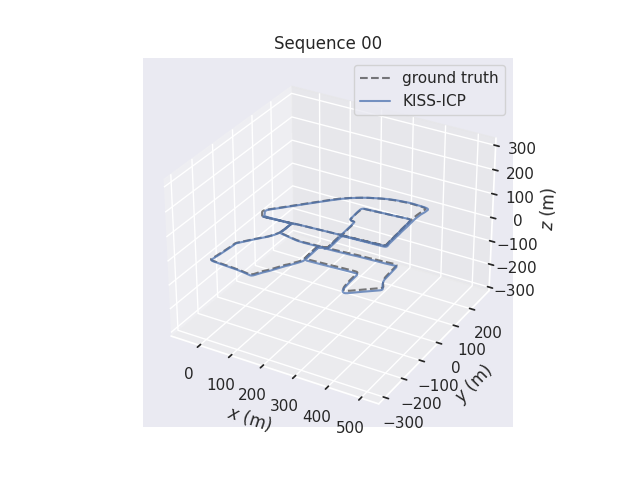

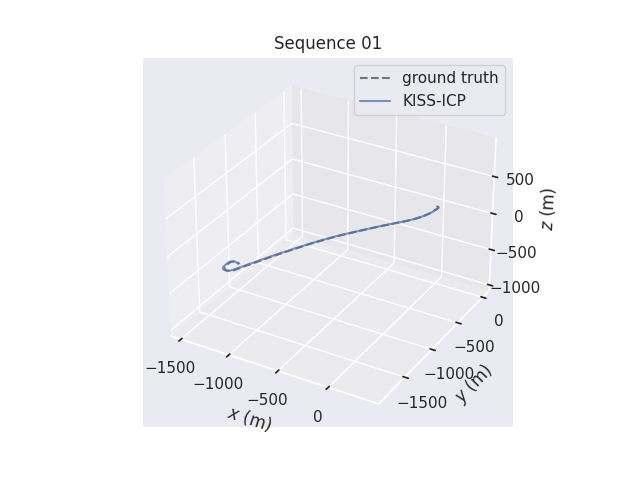

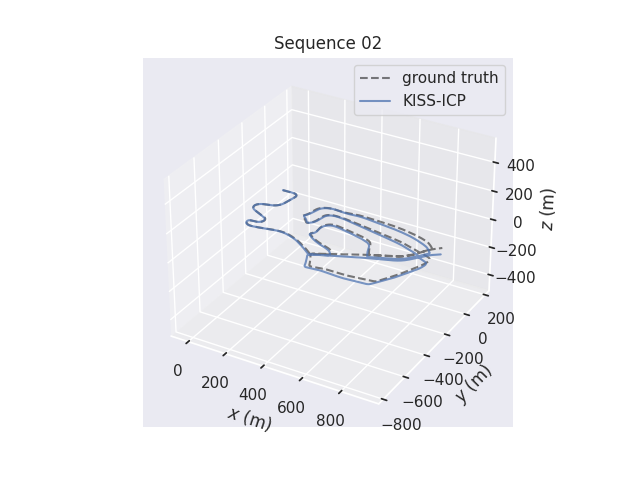

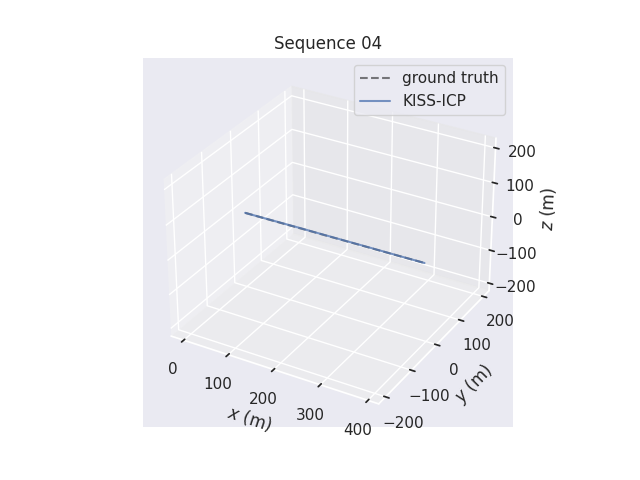

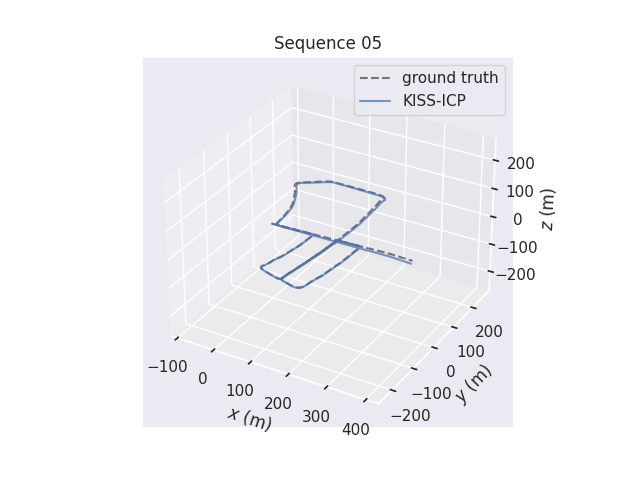

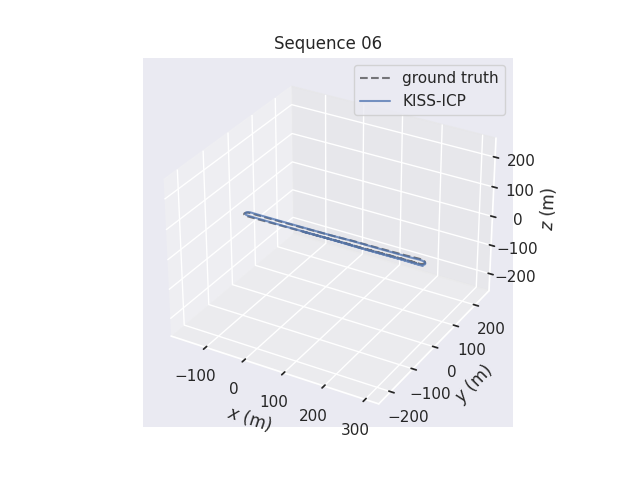

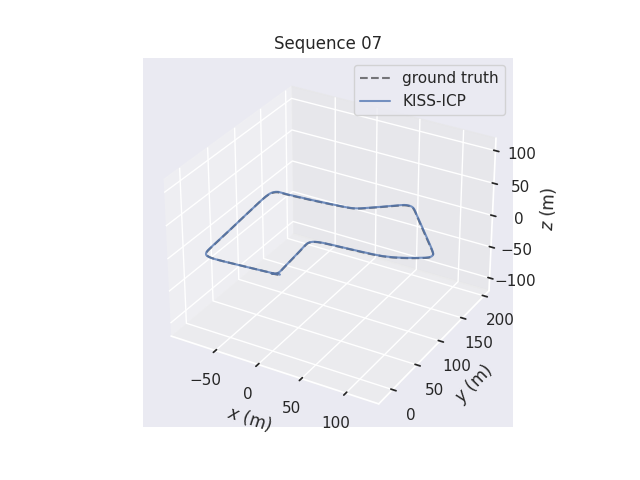

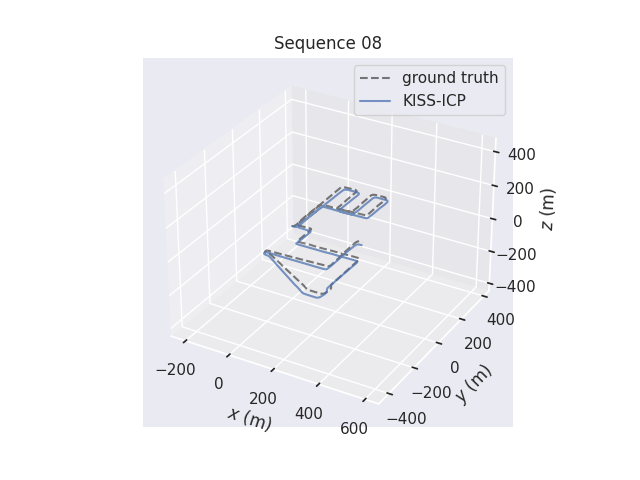

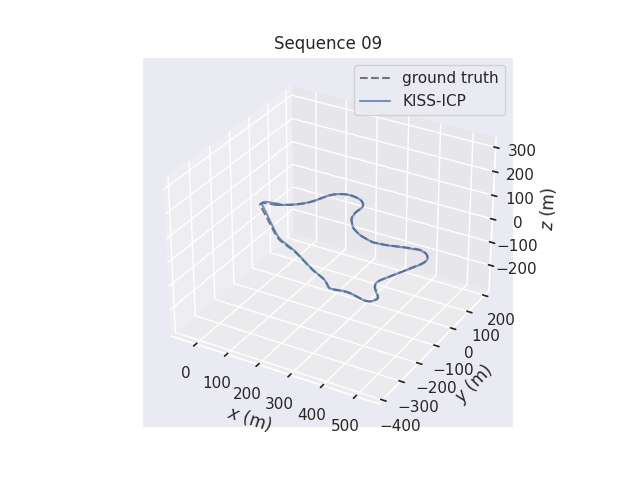

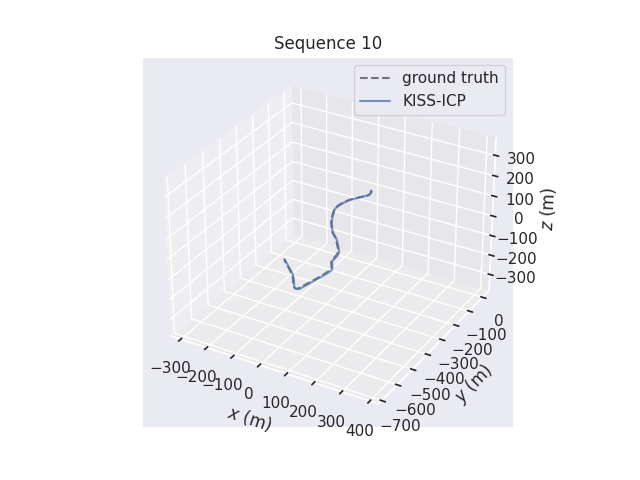

In [6]:
from kiss_icp_eval import plot_trajectories

plot_trajectories(results)